In [48]:
# Import packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from numpy import arange
%matplotlib inline

# Growth Challenge

To start the exploration process, we first had a look at the data.

In [2]:
train_data=pd.read_csv('./growth_train.csv').drop("Unnamed: 0",axis=1)
train_data

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,Argentina,"0,617645085",0,"4462,001465","0,156622976","4,989999771","0,933333337","1,933333278"
1,United States,"1,712264895",0,"9895,003906","0,160815045","8,659999847",0,"0,433333337"
2,Peru,"0,060205959",0,"2019,000244","0,324612707","3,019999981","0,266666681","0,566666663"
3,Italy,"2,932981491",0,"4564,000488","0,330021679","4,559999943","0,033333335","1,200000048"
4,Greece,"3,224050045",0,2093,"0,337879002","4,369999886","0,166666672","0,166666672"
5,France,"2,431280851",0,"5823,000488","0,339706242","4,650000095",0,"0,300000012"
6,Zaire,"-2,811944485",0,"488,9999084","0,352317631","0,540000021","0,148148149","0,055555556"
7,Uruguay,"1,025308609",0,"3967,999756","0,358856708","5,070000172",0,"0,166666672"
8,Pakistan,"2,698163033",0,638,"0,41760394","0,629999995","0,266666681","0,266666681"
9,Niger,"-2,751477957",0,"531,9998779","0,425837249","0,200000003","0,13333334",0


Apparently, we have only very little training data available. 

## Data pre-processing

### 1) Transform data into the correct format

In [3]:
# we only have numerical features, fist let's check their current data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country_name   45 non-null     object
 1   growth         45 non-null     object
 2   oil            45 non-null     int64 
 3   rgdp60         45 non-null     object
 4   tradeshare     45 non-null     object
 5   yearsschool    45 non-null     object
 6   rev_coups      45 non-null     object
 7   assasinations  45 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.9+ KB


In [3]:
# typecast all values of the numerical features as float type
train_data["growth"]=train_data.growth.apply(lambda x: x.replace(",",".")).astype(float)
train_data["rgdp60"]=train_data.rgdp60.apply(lambda x: x.replace(",",".")).astype(float)
train_data["tradeshare"]=train_data.tradeshare.apply(lambda x: x.replace(",",".")).astype(float)
train_data["yearsschool"]=train_data.yearsschool.apply(lambda x: x.replace(",",".")).astype(float)
train_data["rev_coups"]=train_data.rev_coups.apply(lambda x: x.replace(",",".")).astype(float)
train_data["assasinations"]=train_data.assasinations.apply(lambda x: x.replace(",",".")).astype(float)

In [5]:
train_data.describe(include='all')

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
count,45,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000
unique,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.847426,0.0,2997.489067,0.582602,3.740222,0.191934,0.277531
std,NaN,2.016963,0.0,2523.564715,0.220926,2.353967,0.254682,0.545096
min,NaN,-2.811944,0.0,366.999939,0.156623,0.200000,0.000000,0.000000
25%,NaN,0.617645,0.0,1133.000000,0.455769,1.700000,0.000000,0.000000
50%,NaN,1.712265,0.0,1869.000000,0.552722,3.450000,0.066667,0.066667
75%,NaN,2.889185,0.0,4963.998535,0.681555,4.990000,0.266667,0.200000


### 2) Data Quality: Check for missing values

In [6]:
# Check how many values are missing
train_data.isna().sum()

country_name     0
growth           0
oil              0
rgdp60           0
tradeshare       0
yearsschool      0
rev_coups        0
assasinations    0
dtype: int64

Apparently there are no missing values.

### 3) Remove not relevant columns

Since the column oil contained only 0's we will did ot consider it. Further, we dropped the column containing the country name since we only had one data point for each country in either the training or the (official) test data set, hence it did not contain any useful information the model could infer from the training to the test data. 

In [4]:
train_data.drop(["oil", "country_name"], axis=1, inplace=True)

### 4) Check Data Distribution

To get a feeling for the data, we had a look at the distribution by plotting a boxplot and a scatter matrix for each pair of 2 features.

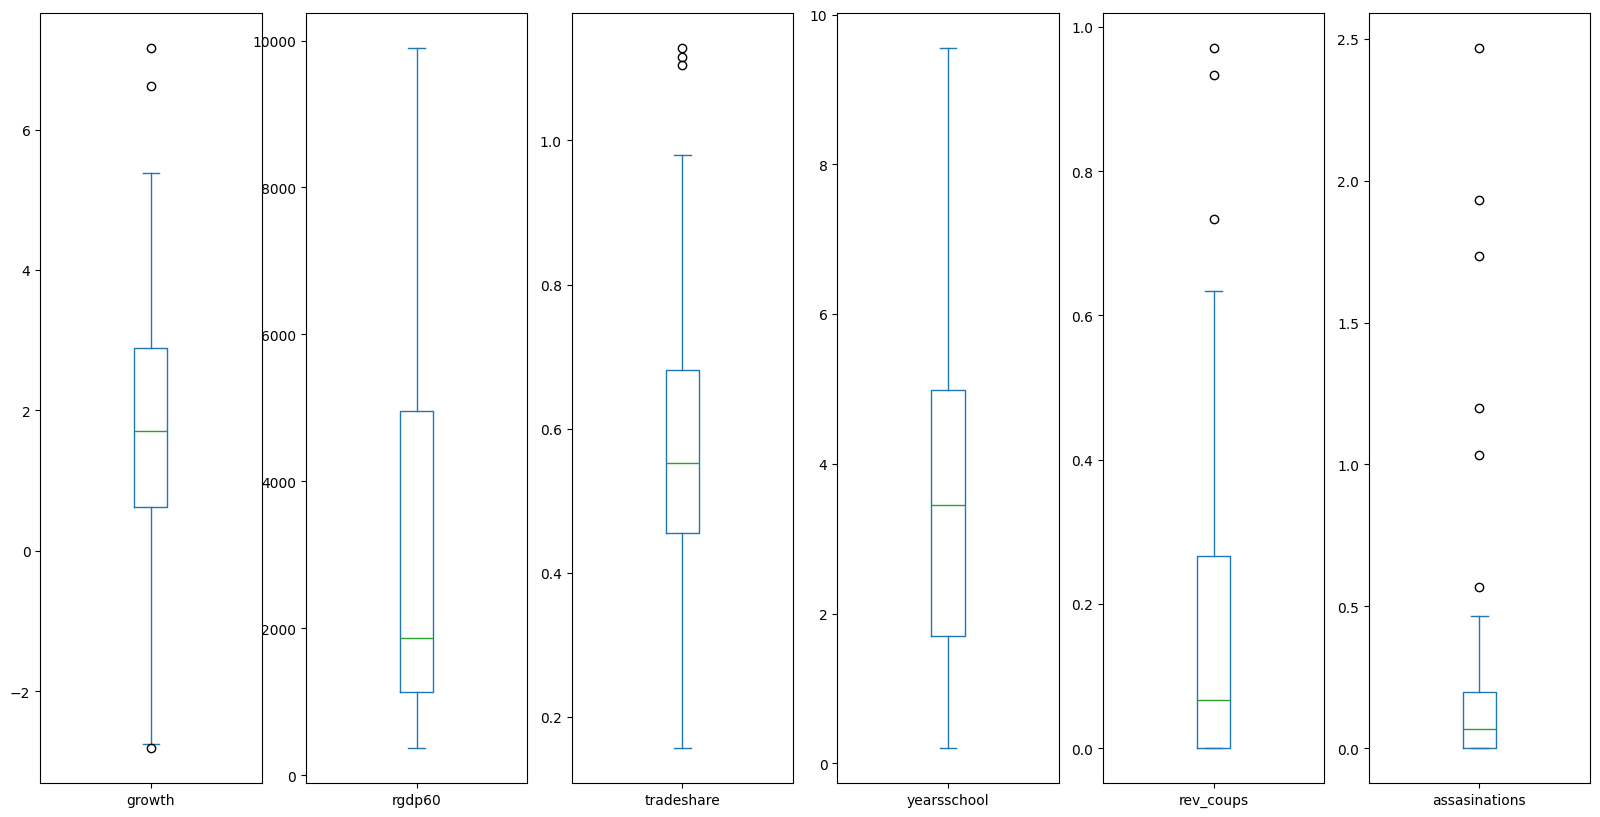

In [11]:
train_data.plot(kind='box', subplots=True, figsize=(20, 10))
plt.savefig("images/Boxplot growth.svg", format="svg")
plt.show()

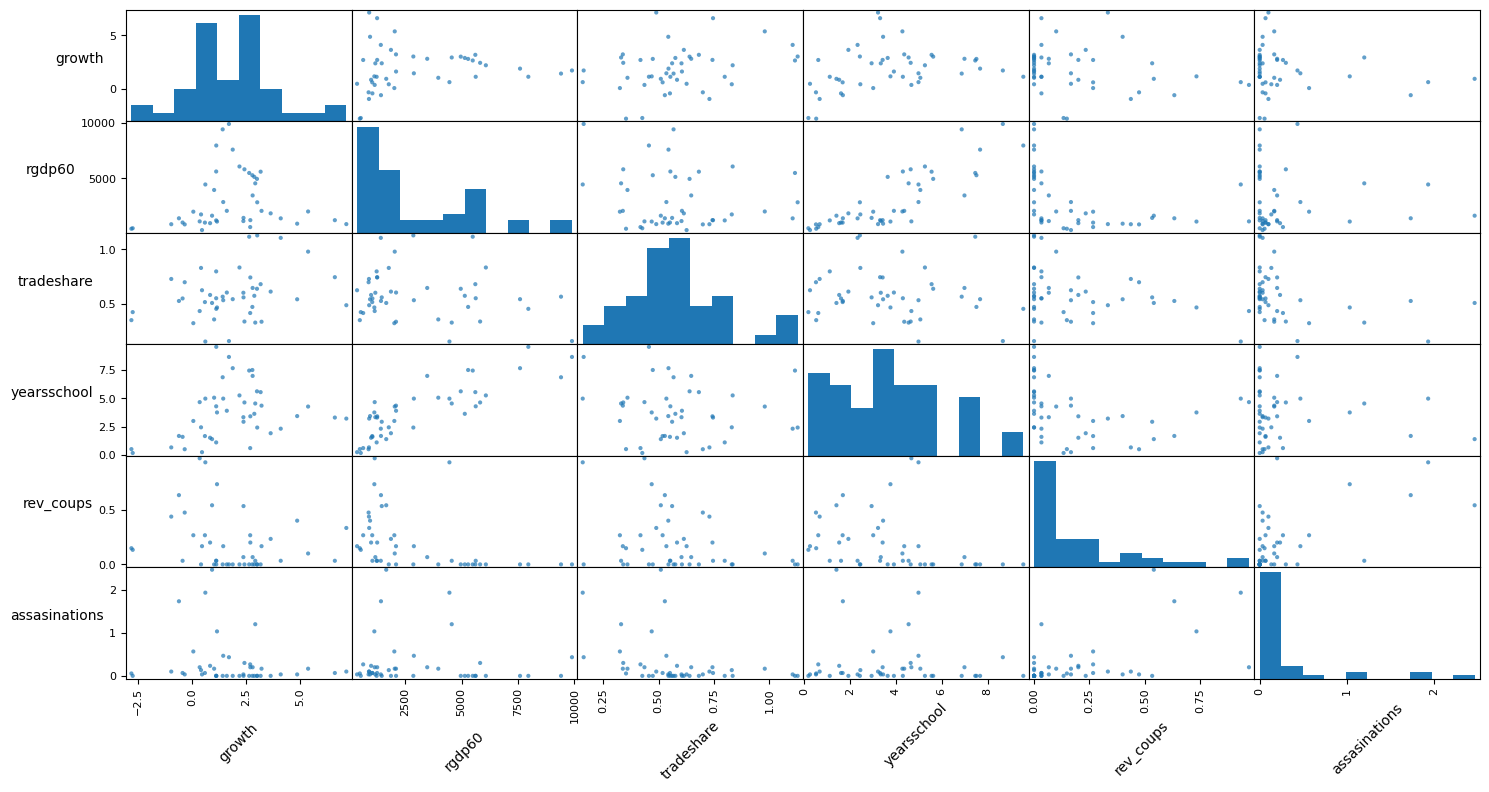

In [12]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(train_data,figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.savefig("images/Scatter Matrix growth.svg", format="svg")
plt.show()

By looking at the plots we observed that rdgp60, rev_coups and assasinations have a skewed distribution, while growth, yearsschool and tradeshare seem to have distributions closer to a normal distribution. 

### 5) Check the correlation 
By plotting the correlation matrix, we wanted to examine the correlation between the features and the target variable on the one hand and the correlation between the features on the other hand. By looking at the correlation between the target variable and the features we could identify features that do not have a big impact on the value we want to predict and hence do not have to be considered for our model. The the smallest absolute correlation with 'growth' had the feature 'rgdp60', but 0.11 seemed related enough, and we decided to keep all features. Further, checking the correlation between the features allowed us to find features with a strong linear dependency. 'rgdp60' and 'yearsschool' had the highest correlation.

<Axes: >

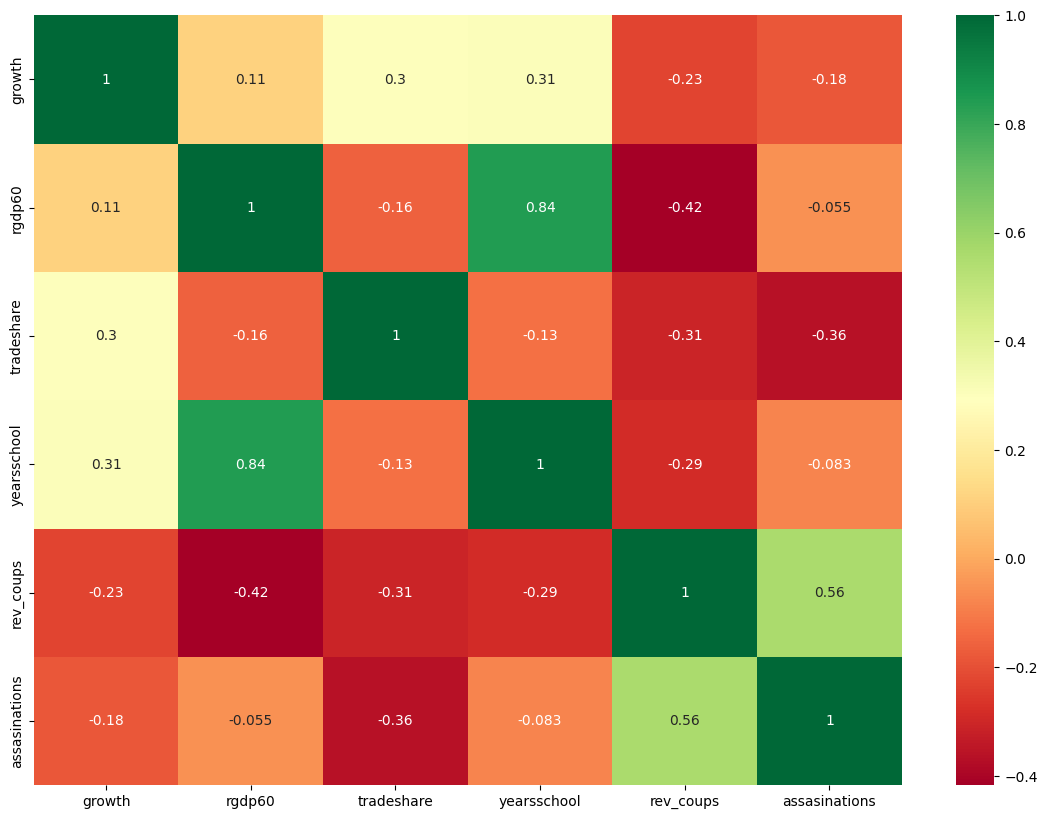

In [10]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(train_data.corr(method='pearson'), annot=True,cmap ='RdYlGn')

### Test-train split to avoid overfitting my model
Since we have no labels for the provided test data set, we have to split the training data into a test and training set where we can use the training data to train the model and the test data to prevent over-fitting.This had to happen before we apply steps like scaling, since the scaler should only be fitted on to the data used for model training and not for the test data to avoid biasing the tests.

In [137]:
X_base = train_data.drop(["growth"], axis = 1)
y = train_data["growth"]

X_train_base, X_test_base, y_train, y_test = train_test_split(X_base,y, test_size=0.2,shuffle=True, random_state=42)

### Handle skewed data

We recognized that of the remaining five features, three were skewed having most data with a value of 0. Skewed data can be a problem, which is why we applied a log transformation to transform the distribution more into a normal distribution shape. Since we wanted to evaluate if this is actually improving model training, we kept a version of the untransformed data. The transformations also have to be applied to the test data. Since log of 0 is not computable, we added an epsilon to the data to get a transformed value for each data point.

In [138]:
X_train_transformed = X_train_base.copy()
X_test_transformed = X_test_base.copy()

In [139]:
epsilon = 0.01
X_train_transformed["rgdp60"]=X_train_base["rgdp60"].apply(lambda x: np.log10(x + epsilon))
X_test_transformed["rgdp60"]=X_test_base["rgdp60"].apply(lambda x: np.log10(x + epsilon))

X_train_transformed["rev_coups"]=X_train_base["rev_coups"].apply(lambda x: np.log10(x + epsilon))
X_test_transformed["rev_coups"]=X_test_base["rev_coups"].apply(lambda x: np.log10(x + epsilon))


X_train_transformed["assasinations"]=X_train_base["assasinations"].apply(lambda x: np.log10(x + epsilon))
X_test_transformed["assasinations"]=X_test_base["assasinations"].apply(lambda x: np.log10(x + epsilon))

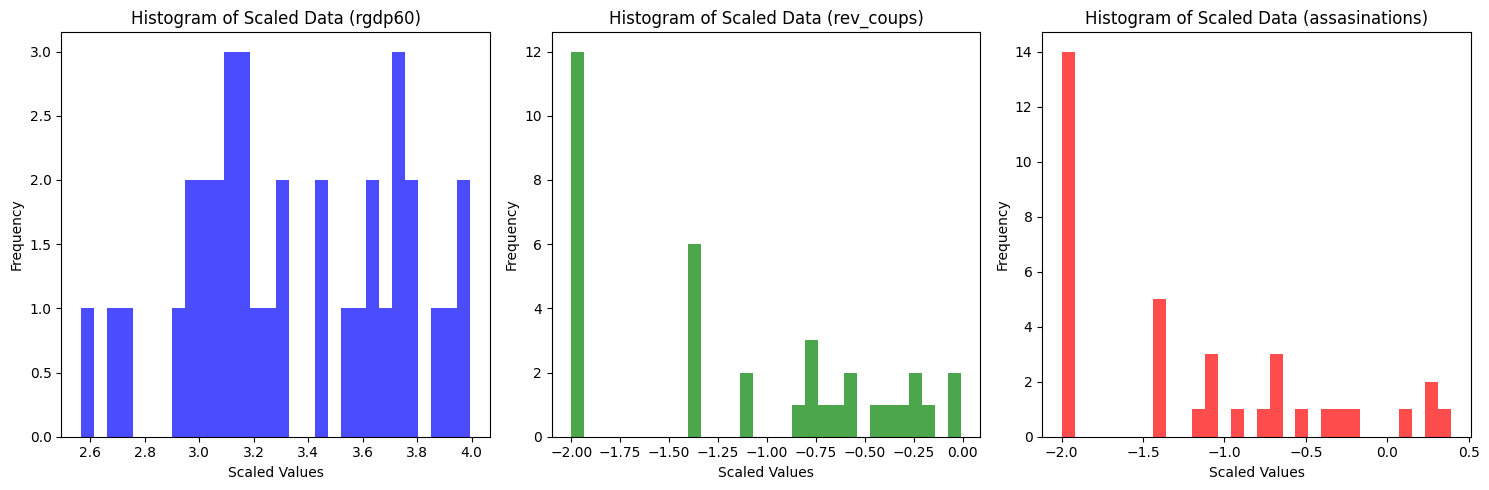

In [140]:
import matplotlib.pyplot as plt

# Plot histograms of the scaled data in a row
plt.figure(figsize=(15, 5))

# Histogram for the first feature
plt.subplot(1, 3, 1)
plt.hist(X_train_transformed["rgdp60"], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Scaled Data (rgdp60)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

# Histogram for the second feature
plt.subplot(1, 3, 2)
plt.hist(X_train_transformed["rev_coups"], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Scaled Data (rev_coups)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

# Histogram for the third feature
plt.subplot(1, 3, 3)
plt.hist(X_train_transformed["assasinations"], bins=30, color='red', alpha=0.7)
plt.title('Histogram of Scaled Data (assasinations)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


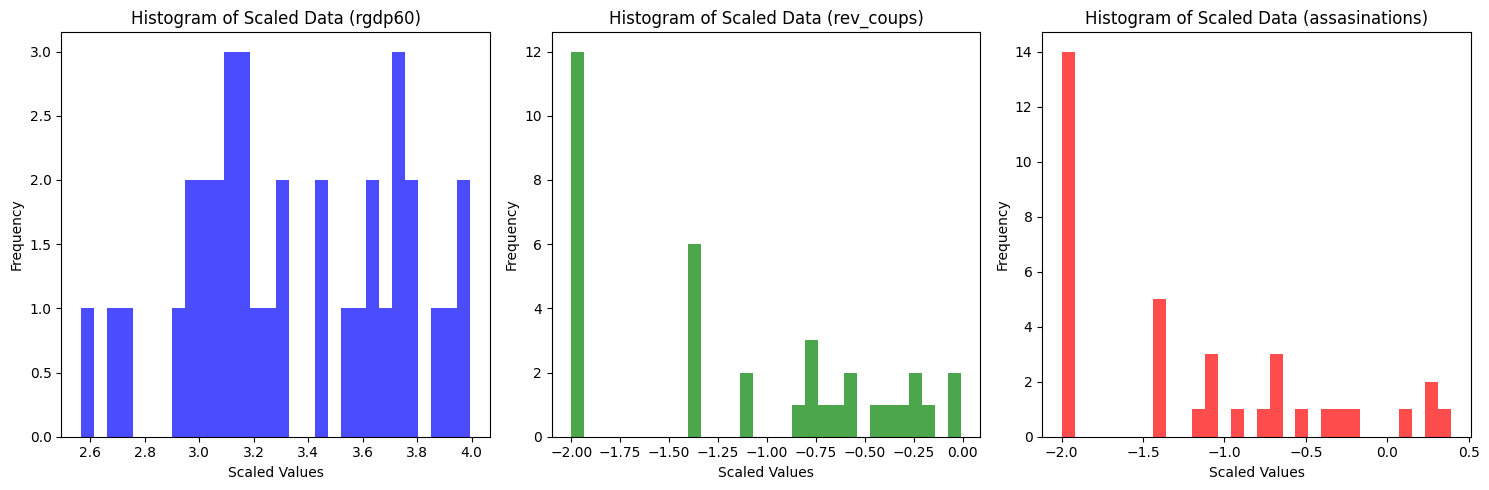

In [141]:
import matplotlib.pyplot as plt

# Plot histograms of the scaled data in a row
plt.figure(figsize=(15, 5))

# Histogram for the first feature
plt.subplot(1, 3, 1)
plt.hist(X_train_transformed["rgdp60"], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Scaled Data (rgdp60)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

# Histogram for the second feature
plt.subplot(1, 3, 2)
plt.hist(X_train_transformed["rev_coups"], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Scaled Data (rev_coups)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

# Histogram for the third feature
plt.subplot(1, 3, 3)
plt.hist(X_train_transformed["assasinations"], bins=30, color='red', alpha=0.7)
plt.title('Histogram of Scaled Data (assasinations)')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


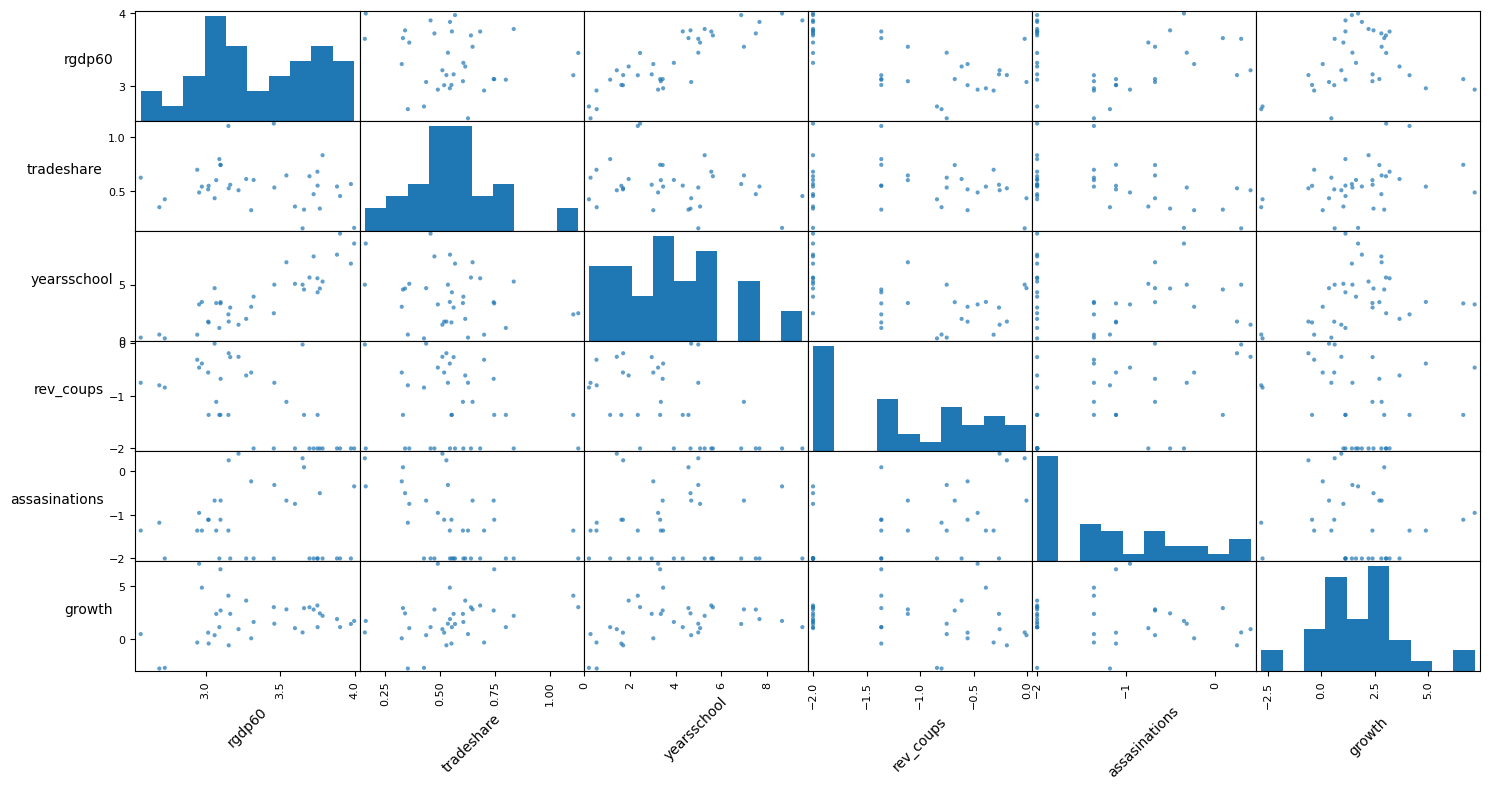

In [142]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(pd.concat([X_train_transformed,y_train],axis=1),figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.savefig("images/Transformed scatter matrix.svg", format="svg")
plt.show()

### Scale data to values between 0 and 1 
Since some models like Lasso tend to prefer feature with larger value ranges, we had to scale the values of each feature between 0 and 1 to transform them ot the same scale. It is important to fit the scalers only on the training data to avoid leaking information from the test data during training, which reduces the independence of the test data for model evaluation. Since we were not sure if a standard or min-max scaler will bring better results, we tried both.

In [143]:
# Create a StandardScaler object
scaler_std = StandardScaler()
scaler_std_trns = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_minmax_trns = MinMaxScaler()

##### Standard Scaler

In [144]:
X_train_scaled_std_and_transformed = X_train_transformed.copy()
X_test_scaled_std_and_transformed = X_test_transformed.copy()

#Fit the scaler to the data and transform the data
X_train_scaled_std_and_transformed =  pd.DataFrame(scaler_std_trns.fit_transform(X_train_transformed), columns=X_train_base.columns)
X_test_scaled_std_and_transformed =  pd.DataFrame(scaler_std_trns.transform(X_test_transformed), columns=X_train_base.columns)

In [145]:
X_train_scaled_std = X_train_base.copy()
X_test_scaled_std = X_test_base.copy()


#Fit the scaler to the data and transform the data
X_train_scaled_std =  pd.DataFrame(scaler_std.fit_transform(X_train_base), columns=X_train_base.columns)
X_test_scaled_std =  pd.DataFrame(scaler_std.transform(X_test_base), columns=X_train_base.columns)

##### MinMax Scaler

In [146]:
X_train_scaled_minmax = X_train_base.copy()
X_test_scaled_minmax = X_test_base.copy()

# Fit the scaler to the data and transform the data
X_train_scaled_minmax_and_transformed =  pd.DataFrame(scaler_minmax_trns.fit_transform(X_train_transformed), columns=X_train_base.columns)
X_test_scaled_minmax_and_transformed =  pd.DataFrame(scaler_minmax_trns.transform(X_test_transformed), columns=X_train_base.columns)

In [147]:
X_train_scaled_minmax = X_train_base.copy()
X_test_scaled_minmax = X_test_base.copy()


# Fit the scaler to the data and transform the data
X_train_scaled_minmax=  pd.DataFrame(scaler_minmax.fit_transform(X_train_transformed), columns=X_train_base.columns)
X_test_scaled_minmax =  pd.DataFrame(scaler_minmax.transform(X_test_transformed), columns=X_train_base.columns)

### Remove Outliers

Since we only have a few data points, we were not sure if removing outliers is a good idea. Hence we created for each version of preprocessed data also a version without outliers to test if removing outliers enhances our trained model. We were using the inter-quartile ratio to remove outliers, which assumes a normal distribution. Since three of our features have a skewed data distribution and the log transformation reduced but not removed the skewedness, we applied the outlier removal step only to the features with a more normal like distribution. 

In [148]:
def remove_outliers(data, features):
    data_copy = data.copy()
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_copy =data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)].index

    return data_copy


In [149]:
X_train_scaled_minmax_outlier = X_train_scaled_minmax.copy()
y_train_minmax_outlier = y_train.copy()
X_train_scaled_minmax_outlier = X_train_scaled_minmax.loc[remove_outliers(X_train_scaled_minmax,["yearsschool","tradeshare"])]
y_train_minmax_outlier = y_train_minmax_outlier.iloc[remove_outliers(X_train_scaled_minmax,["yearsschool","tradeshare"])]

X_train_scaled_std_outlier = X_train_scaled_std.copy()
y_train_std_outlier = y_train.copy()
X_train_scaled_std_outlier = X_train_scaled_std.loc[remove_outliers(X_train_scaled_std,["yearsschool","tradeshare"])]
y_train_std_outlier = y_train_std_outlier.iloc[remove_outliers(X_train_scaled_std,["yearsschool","tradeshare"])]

X_train_scaled_minmax_and_transformed_outlier = X_train_scaled_minmax_and_transformed.copy()
y_train_minmax_transformed_outlier = y_train.copy()
X_train_scaled_minmax_and_transformed_outlier = X_train_scaled_minmax_and_transformed.loc[remove_outliers(X_train_scaled_minmax_and_transformed,["yearsschool","tradeshare"])]
y_train_minmax_transformed_outlier = y_train_minmax_transformed_outlier.iloc[remove_outliers(X_train_scaled_minmax_and_transformed,["yearsschool","tradeshare"])]

X_train_scaled_std_and_transformed_outlier = X_train_scaled_std_and_transformed.copy()
y_train_std_transformed_outlier = y_train.copy()
X_train_scaled_std_and_transformed_outlier = X_train_scaled_std_and_transformed.loc[remove_outliers(X_train_scaled_std_and_transformed,["yearsschool","tradeshare"])]
y_train_std_transformed_outlier =  y_train_std_transformed_outlier.iloc[remove_outliers(X_train_scaled_std_and_transformed,["yearsschool","tradeshare"])]


## Model training

According to the "no free lunch theorem", no model is generally superior for a task, which is why we tried different approaches. For each model, we wrote a method that uses a grid search and k-fold cross validation with 3 folds to identify the best hyper parameters for each model and each training data version. Further, we wrote a method that computes the R^2 score and the MAE of each model for the training and the test data.

In [150]:
# FUnction to evaluate the trained models
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    
    print('Model Performance')
    print(f"Training MAE: {mean_absolute_error(y_train, y_train_pred)}")
    print(f"Training R2: {r2_score(y_train, y_train_pred)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")
    print(f"Test R2: {r2_score(y_test, y_test_pred)}")


In [47]:
# Gird search of parameters, using 3 fold cross validation to find the best random forest regressor
def best_Random_Forrest_regressor (X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    # Number of trees in random forest
    n_estimators = range( 1800, 2100,  20)
    # Maximum number of levels in tree
    max_depth = range (5, 30, 5)
    # Minimum number of samples required to split a node
    min_samples_split = [10,15,20]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2]
  
    # Create the random grid
    grid = {'n_estimators': n_estimators,
                'max_features': ['sqrt'],
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': [False]}
    
    rf_grid = GridSearchCV(rf, grid, cv = 3, verbose=2,  n_jobs = -1)
    # Fit the random search model
    rf_grid.fit(X_train, y_train)
    
    best_rf = rf_grid.best_estimator_
    evaluate(best_rf,  X_train, X_test, y_train, y_test)
    return best_rf

In [45]:
# Gird search of parameters, using 3 fold cross validation to find the best elastic net regressor
def best_Elastic_Net_regressor (X_train, X_test, y_train, y_test):
    elastic = ElasticNet()
    # Number of trees in random forest
    alpha =  arange(0, 1, 0.01)
    # Maximum number of levels in tree
    l1_ratio = arange(0, 1, 0.1)

  
    # Create the random grid
    grid = {'alpha': alpha,
            'l1_ratio': l1_ratio 
            }
    
    elastic_grid = GridSearchCV(elastic, grid, cv = 3, verbose=2,  n_jobs = -1)
    # Fit the random search model
    elastic_grid.fit(X_train, y_train)
    
    best_elastic = elastic_grid.best_estimator_
    evaluate(best_elastic,  X_train, X_test, y_train, y_test)
    return best_elastic

In [40]:
# Gird search of parameters, using 3 fold cross validation to find the best XGBoost regressor

def best_XGBoost_regressor (X_train, X_test, y_train, y_test):
    xgb = XGBRegressor(objective='reg:squarederror')
    # Number of trees in random forest
    grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(1, 25, 2),
    'learning_rate': [0.1, 0.075, 0.05, 0.025, 0.01,]
    }

    xgb_grid = GridSearchCV(xgb, grid, cv = 3, verbose=2,  n_jobs = -1)
    
    # Fit the random search model
    xgb_grid.fit(X_train, y_train)
    
    best_xgb = xgb_grid.best_estimator_
    evaluate(best_xgb,  X_train, X_test, y_train, y_test)
    return best_xgb

In [124]:
# Gird search of parameters, using 3 fold cross validation to find the best lasso regressor

def best_lasso_regressor (X_train, X_test, y_train, y_test):
    lasso = Lasso()
    # Number of trees in random forest
    grid = {
    'alpha': arange(0, 1, 0.01)
    }

    lasso_grid = GridSearchCV(lasso, grid, cv = 3, verbose=2,  n_jobs = -1)
    
    # Fit the random search model
    lasso_grid.fit(X_train, y_train)
    
    best_lasso = lasso_grid.best_estimator_
    evaluate(best_lasso,  X_train, X_test, y_train, y_test)
    return best_lasso

### Base line model

To evaluate if the pre-processing steps were actually helpful to improve model performance, we first build a base line model for each regression method. Here we only transformed the data into the correct format and removed the not relevant features. Then we tested the models for each step of the pre-processing/version of the test data to identify which pre-processing steps were helpful for training a better mdoel and which not.

In [44]:
rf_base = best_Random_Forrest_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12150 fits failed out of a total of 24300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5935 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\lo

Model Performance
Training MAE: 0.7175706426122045
Training R2: 0.771777646876941
Test MAE: 1.5945250508603228
Test R2: -0.23188304491904965


In [51]:
elastic_base = best_Elastic_Net_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.25943720400536
Training R2: 0.3049674824017674
Test MAE: 1.5292070284556851
Test R2: 0.14059130186999602


C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.578e+01, tolerance: 1.506e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [70]:
xgb_base = best_XGBoost_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [34]:
lasso_base = best_lasso_regressor (X_train_base, X_test_base, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.2581495817078006
Training R2: 0.289499226490194
Test MAE: 1.5693400676514413
Test R2: 0.10923208550351449


### Use scaled data
For the lasso and the elastic net model, results were improving when the data was scaled while the results of XGBoost remained the same (which can be expected). The models trained o on the min-max scaled data performed better. 

In [49]:
elastic_scaled_minmax = best_Elastic_Net_regressor(X_train_scaled_minmax, X_test_scaled_minmax, y_train, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.3895322498255633
Training R2: 0.13980063658053798
Test MAE: 1.4433130574468722
Test R2: 0.09241322890193238


In [71]:
xgb_scaled_minmax = best_XGBoost_regressor (X_train_scaled_minmax, X_test_scaled_minmax, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [47]:
lasso_scaled_minmax = best_lasso_regressor (X_train_scaled_minmax, X_test_scaled_minmax, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4082506624034947
Training R2: 0.11895537702207548
Test MAE: 1.4248844243139163
Test R2: 0.08219126879991168


In [52]:
elastic_scaled_std = best_Elastic_Net_regressor (X_train_scaled_std, X_test_scaled_std, y_train, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.2875872048115393
Training R2: 0.21192016219458487
Test MAE: 1.4907708969590994
Test R2: 0.09979504947956364


C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.425e+01, tolerance: 1.506e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [48]:
xgb_scaled_std = best_XGBoost_regressor (X_train_scaled_std, X_test_scaled_std, y_train, y_test)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [49]:
lasso_scaled_std = best_lasso_regressor (X_train_scaled_std, X_test_scaled_std, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.3899991520400101
Training R2: 0.13637902384772482
Test MAE: 1.4587803365955643
Test R2: 0.07540566646408575


#### Use transformed data

Applying the log transformation to the data did not improve the models compared to the models without the transformation from the previous step.

In [169]:
elastic_transforemd_std = best_Elastic_Net_regressor (X_train_scaled_std_and_transformed, X_test_scaled_std_and_transformed, y_train, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.3871190018191912
Training R2: 0.13942977385510025
Test MAE: 1.460775798004882
Test R2: 0.07717552479911005


In [170]:
xgb_transformed_std = best_XGBoost_regressor (X_train_scaled_std_and_transformed, X_test_scaled_std_and_transformed, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [171]:
lasso_transformed_std = best_lasso_regressor (X_train_scaled_std_and_transformed, X_test_scaled_std_and_transformed, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.3899991520400101
Training R2: 0.13637902384772482
Test MAE: 1.4587803365955643
Test R2: 0.07540566646408575


In [172]:
elastic_transformed_minmax = best_Elastic_Net_regressor (X_train_scaled_minmax_and_transformed, X_test_scaled_minmax_and_transformed, y_train, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.3895322498255633
Training R2: 0.13980063658053798
Test MAE: 1.4433130574468722
Test R2: 0.09241322890193238


In [173]:
xgb_transformed_minmax= best_XGBoost_regressor (X_train_scaled_minmax_and_transformed, X_test_scaled_minmax_and_transformed, y_train, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.0402863599407495
Training R2: 0.5235351910610981
Test MAE: 1.5344454745941825
Test R2: -0.10674832169656479


In [174]:
lasso_transformed_minmax = best_lasso_regressor (X_train_scaled_minmax_and_transformed, X_test_scaled_minmax_and_transformed, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.3832210480828457
Training R2: 0.14474208987804327
Test MAE: 1.4514284969360665
Test R2: 0.09117334524138776


#### Use data without outliers

In a third step we also checked if the model improves when outliers were removed. Even though the transformed scaled models performed worse than the not transformed ones, when removing outliers the best model with the smallest MAE was the min-max scaled one which was also transformed. 

In [153]:
elastic_scaled_outlier_minmax = best_Elastic_Net_regressor (X_train_scaled_minmax_outlier, X_test_scaled_minmax, y_train_minmax_outlier, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.4355381430894838
Training R2: 0.12759069956275892
Test MAE: 1.3705717521015606
Test R2: 0.13028403145311784


In [154]:
xgb_scaled_outlier_minmax = best_XGBoost_regressor (X_train_scaled_minmax_outlier, X_test_scaled_minmax, y_train_minmax_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [155]:
lasso_scaled_outlier_minmax = best_lasso_regressor (X_train_scaled_minmax_outlier, X_test_scaled_minmax, y_train_minmax_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4341689499355548
Training R2: 0.12674802768021687
Test MAE: 1.3592891077071805
Test R2: 0.13370002496697708


In [156]:
# Get parameter of best lasso model for min-max scaled data without outliers
lasso_scaled_outlier_minmax

Lasso(alpha=0.08)

In [157]:
elastic_scaled_outlier_std = best_Elastic_Net_regressor (X_train_scaled_std_outlier, X_test_scaled_minmax, y_train_std_outlier, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.3453395145062161
Training R2: 0.2354642378881897
Test MAE: 1.4146777929828114
Test R2: 0.07310137054947896


C:\Users\kathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.902e+01, tolerance: 1.422e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [158]:
xgb_scaled_outlier_std = best_XGBoost_regressor (X_train_scaled_std_outlier, X_test_scaled_std, y_train_std_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [159]:
lasso_scaled_outlier_std = best_lasso_regressor (X_train_scaled_std_outlier, X_test_scaled_std, y_train_std_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4577035544286923
Training R2: 0.10882467733791912
Test MAE: 1.367126567059672
Test R2: 0.11433487957128907


In [161]:
elastic_transforemd_outlier_std = best_Elastic_Net_regressor(X_train_scaled_std_and_transformed_outlier, X_test_scaled_std_and_transformed, y_train_std_transformed_outlier, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.4555662328920276
Training R2: 0.11129799663453166
Test MAE: 1.3656480524981869
Test R2: 0.11511253693629697


In [162]:
xgb_transformed_outlier_std = best_XGBoost_regressor (X_train_scaled_std_and_transformed_outlier, X_test_scaled_std_and_transformed, y_train_std_transformed_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [163]:
lasso_transformed_outlier_std = best_lasso_regressor (X_train_scaled_std_and_transformed_outlier, X_test_scaled_std_and_transformed, y_train_std_transformed_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4577035542404033
Training R2: 0.10882467753844494
Test MAE: 1.3671265668850994
Test R2: 0.11433487968198275


In [165]:
elastic_transformed_outlier_minmax = best_Elastic_Net_regressor (X_train_scaled_minmax_and_transformed_outlier, X_test_scaled_minmax_and_transformed, y_train_minmax_transformed_outlier, y_test)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model Performance
Training MAE: 1.4355381430894838
Training R2: 0.12759069956275892
Test MAE: 1.3705717521015606
Test R2: 0.13028403145311784


In [166]:
xgb_transformed_outlier_minmax= best_XGBoost_regressor (X_train_scaled_minmax_and_transformed_outlier, X_test_scaled_minmax_and_transformed, y_train_minmax_transformed_outlier, y_test)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Model Performance
Training MAE: 1.065305420456848
Training R2: 0.5294780618356635
Test MAE: 1.5601865649713542
Test R2: -0.10074096326657722


In [167]:
lasso_transformed_outlier_minmax = best_lasso_regressor (X_train_scaled_minmax_and_transformed_outlier, X_test_scaled_minmax_and_transformed, y_train_minmax_transformed_outlier, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Training MAE: 1.4341689499355548
Training R2: 0.12674802768021687
Test MAE: 1.3592891077071805
Test R2: 0.13370002496697708


In [168]:
# Get parameter of best lasso model for min-max scaled data without outliers and with log transformation
lasso_transformed_outlier_minmax

Lasso(alpha=0.08)

## Training the final 
The training showed that using the min-max scaler worked slightly better. Further, transforming the skewed data using the log transformed data alone was not improving the trained models, but together with outlier detection it worked well. Scaling and outlier removal seem to improve the trained models in general. Since the models using the min-max scaled data without outliers (both, log transformed and not transformed) performed best during model evaluation, we decided to do a prediction with both models and use the best one.
We used the optimal hyperparameters for the lasso model we found in the previous step to train a final model using all training data.

In [190]:
# Use all available data as data set for final training
X_final = train_data.drop(['growth'], axis=1)
y_final = train_data['growth']
X_final.shape

(45, 5)

In [191]:
# Apply log transformation to the final training data
epsilon = 0.01
X_transformed=X_final.copy()
X_transformed["rgdp60"]=X_final["rgdp60"].apply(lambda x: np.log10(x + epsilon))
X_transformed["rev_coups"]=X_final["rev_coups"].apply(lambda x: np.log10(x + epsilon))

In [194]:
# Create a dScaler object
scaler_minmax_final = MinMaxScaler()
scaler_minmax_final_trans = MinMaxScaler()

#Fit a minmax scaler to the data and apply the scaler to the data for both, the not transformed and the log transformed data
X_scaled_minmax =  pd.DataFrame(scaler_minmax_final.fit_transform(X_final), columns=X_final.columns)
X_scaled_minmax_transformed =  pd.DataFrame(scaler_minmax_final_trans.fit_transform(X_transformed), columns=X_transformed.columns)

# Remove outliers from both data versions
X_scaled_minmax_outlier = X_scaled_minmax.loc[remove_outliers(X_scaled_minmax,["yearsschool","tradeshare"])]
y_minmax_outlier = y_final.iloc[remove_outliers(X_scaled_minmax,["yearsschool","tradeshare"])]

X_scaled_minmax_transformed_outlier = X_scaled_minmax_transformed.loc[remove_outliers(X_scaled_minmax_transformed,["yearsschool","tradeshare"])]
y_minmax_transformed_outlier = y_final.iloc[remove_outliers(X_scaled_minmax_transformed,["yearsschool","tradeshare"])]


In [195]:
# Train the final lasso model with the best parameter setting found during model evaluation for the not log transformed data
lasso_minmax = Lasso(alpha=0.08)
lasso_minmax.fit(X_scaled_minmax_outlier, y_minmax_outlier)

Lasso(alpha=0.08)

In [196]:
# Train the final lasso model with the best parameter setting found during model evaluation for the not log transformed data
lasso_minmax_transformed = Lasso(alpha=0.08)
lasso_minmax_transformed.fit(X_scaled_minmax_transformed_outlier, y_minmax_transformed_outlier)

Lasso(alpha=0.08)

### Apply final model to test data

After we trained the final models, we had to apply the same pre-processing steps as on the training data to the final test data. Then we used the final models to get the final predictions for the test data. We submitted the final predictions of both models and used the better one. 

In [212]:
# Import test data, transform python data type and drop not relevant columns
test_data=pd.read_csv('./growth_test.csv').drop("Unnamed: 0",axis=1)
test_data["rgdp60"]=test_data.rgdp60.apply(lambda x: x.replace(",",".")).astype(float)
test_data["tradeshare"]=test_data.tradeshare.apply(lambda x: x.replace(",",".")).astype(float)
test_data["yearsschool"]=test_data.yearsschool.apply(lambda x: x.replace(",",".")).astype(float)
test_data["rev_coups"]=test_data.rev_coups.apply(lambda x: x.replace(",",".")).astype(float)
test_data["assasinations"]=test_data.assasinations.apply(lambda x: x.replace(",",".")).astype(float)

test_data.drop(["oil","country_name"], axis=1,inplace=True)
test_data

,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,765.999817,0.140502,1.45,0.133333,0.866667
1,2953.999512,0.157703,6.71,0.000000,0.200000
2,1783.999878,0.160405,2.89,0.100000,0.100000
3,951.999817,0.221458,0.79,0.306481,0.175000
4,3123.001465,0.299406,3.80,0.066667,1.433333
5,1684.000366,0.313073,2.97,0.100000,0.766667
6,923.999939,0.324746,0.70,0.374074,0.200000
7,7782.002441,0.329479,9.03,0.000000,0.066667
8,2836.000244,0.393251,2.41,0.000000,0.166667
9,6569.998535,0.442143,7.64,0.066667,0.233333


In [205]:
# Apply log transformation 
epsilon = 0.01
X_test_transformed=test_data.copy()
X_test_transformed["rgdp60"]=X_test_transformed["rgdp60"].apply(lambda x: np.log10(x + epsilon))
X_test_transformed["rev_coups"]=X_test_transformed["rev_coups"].apply(lambda x: np.log10(x + epsilon))


In [213]:
# Scale both data versions using the min-max scaler fitted on the final training dataset
X_test_scaled_minmax =  pd.DataFrame(scaler_minmax_final.transform(test_data), columns=X_final.columns)
X_test_scaled_minmax_transformed =  pd.DataFrame(scaler_minmax_final_trans.transform(X_test_transformed), columns=X_final.columns)

In [214]:
# Generate predictions for both data versions
prediction_minmax = lasso_minmax.predict(X_test_scaled_minmax)
prediction_minmax_transformed = lasso_minmax_transformed.predict(X_test_scaled_minmax_transformed)

In [215]:
# Save prediction as csv in the right format
prediction_minmax_df = pd.DataFrame(prediction_minmax, columns=['Expected'])
prediction_minmax_df["Id"]=pd.read_csv('./growth_test.csv')["Unnamed: 0"]
prediction_minmax_df.to_csv("results_minmax.csv", index=False)

In [216]:
# Save prediction as csv in the right format
prediction_minmax_transformed = pd.DataFrame(prediction_minmax_transformed, columns=['Expected'])
prediction_minmax_transformed["Id"]=pd.read_csv('./growth_test.csv')["Unnamed: 0"]
prediction_minmax_transformed.to_csv("results_minmax_trans.csv", index=False)